 翻车了，和官网例子一点都不一样，准确率百分之10.Orz
 ---

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### 第一步：导入数据集
---

In [6]:
# 从keras导入数据
fashion_mnist=keras.datasets.fashion_mnist
# 数据会返回一个四元的numpy数组
# 图像是28*28的numpy数组，像素是0-255
# 标签是0-9的一个范围
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
print(train_images)
print(train_labels)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 3 0 5]


将数据进行映射，因为下载的数据都是0，1，…………需要进行映射

In [13]:
# 将标签名字进行一个映射
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(train_images.shape)
# for i in range(len(test_labels)):
#     print(class_names[test_labels[i]])


(60000, 28, 28)

### 第二部：数据的预处理
这里和一般的机器学习方法一样，主要是预处理，然乎进行训练，画图

--- 

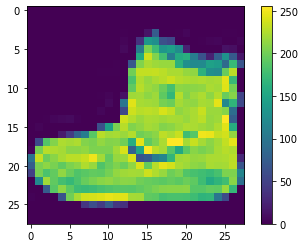

In [20]:
# 官网这里是先查看图像，检查第一个图像是否位于0-255之间
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

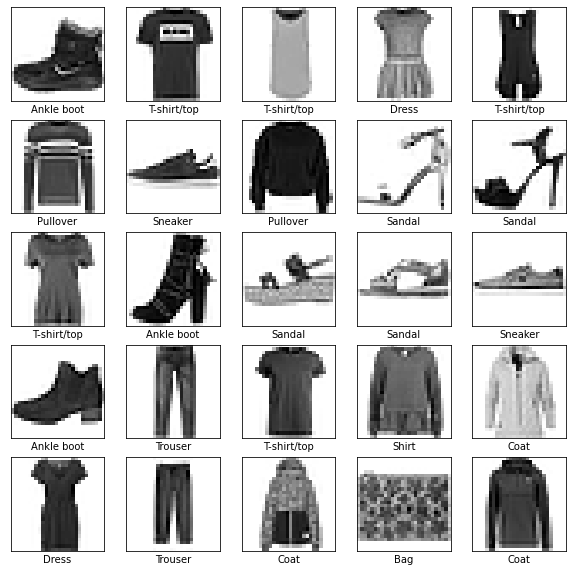

In [29]:
# 由于像素位于0-255之间，为了防止梯度爆炸，要进行一个缩减，方法就是除以255.0
train_images=train_images/255
test_images=test_images/255
# 显示数据前25个图片
# 指定图像的大小，为长宽10英寸
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
#     这两句是设置刻度轴
    plt.xticks([])
    plt.yticks([])
#     令网格模式为false
    plt.grid(False)
#     显示二进制图片
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

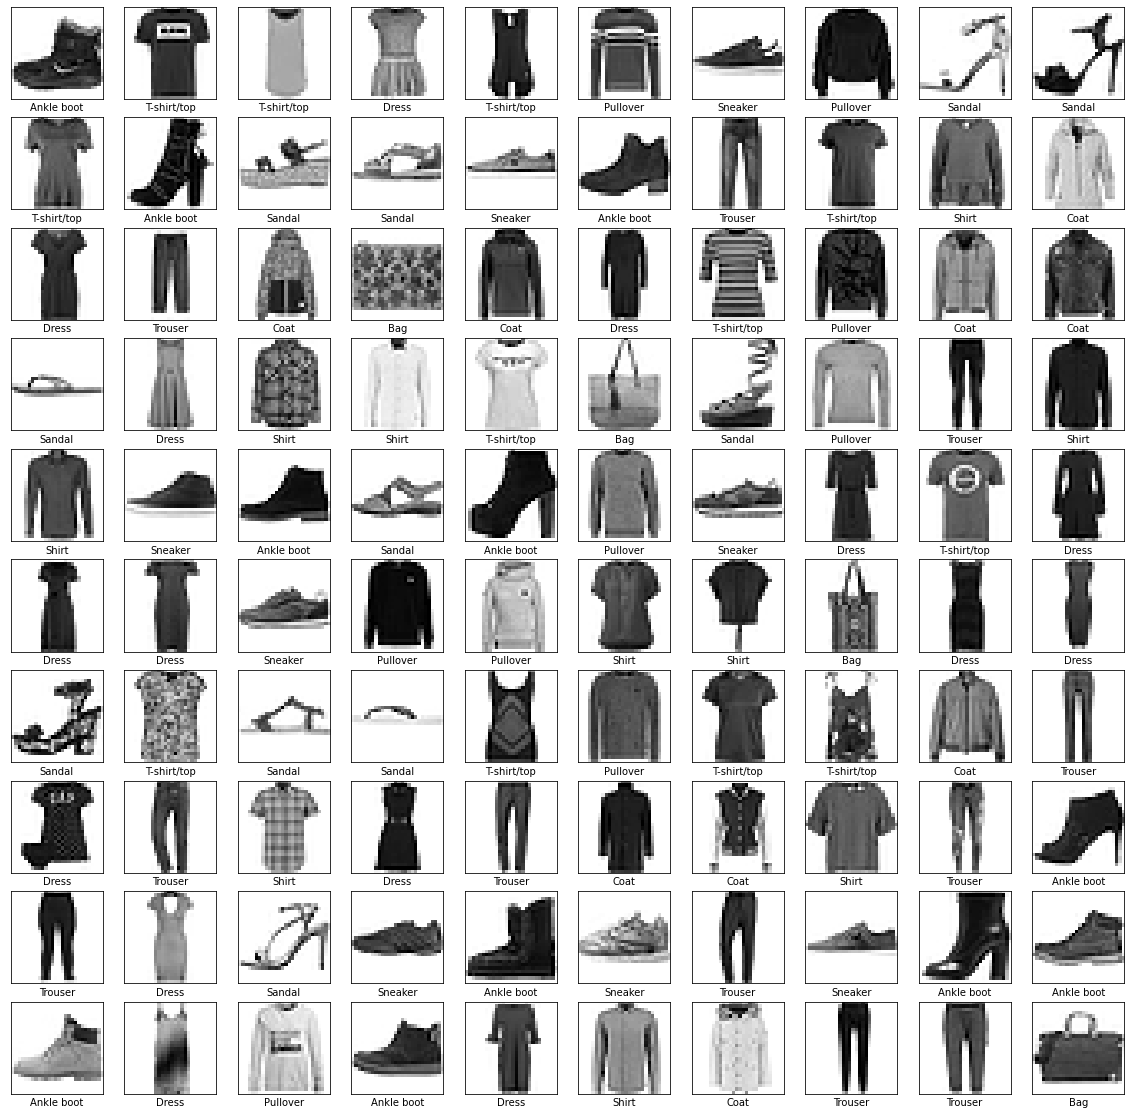

In [32]:
# 这里我自己来写一个显示前100张的图片
# 运行真慢。。得等了一秒钟多。。该换电脑了
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 第三步：定义神经网络的层结构
官网的例子中，模型总共有三层
第一层：对数据进行变换，将原来的（28*28）的图像进行平铺
第二层，设置了一个128的全连接层
第三层，设置了一个10个单元的神经网络层

---

In [35]:
model=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10)
    ]
)

In [37]:
# 进行模型的编译工作
# 例如，损失函数，优化器，指标，参数，超参数等等
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
# 进行模型的训练
# 这里epochs表示训练的轮数
model.fit(train_images,train_labels,epochs=1000)

Epoch 1/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 3/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 4/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1020
Epoch 5/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 6/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 7/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 8/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0972
Epoch 9/1000
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 10/1000
1875/1875 [==============================] - 6s 3m

In [43]:
# 进行准确率的评估
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTestAccuracy',test_acc)


313/313 - 1s - loss: 2.3027 - accuracy: 0.1000

TestAccuracy 0.10000000149011612


In [44]:
predict=keras.Sequential(
[
    model,
    keras.layers.Softmax()
])

In [49]:
prediction=predict.predict(test_images)
prediction[0]
np.argmax(prediction[0])
print(test_labels[0])

9
